# **Photo Editor**
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**

Para poner en practica todo lo aprendido en los temas anteriores, se propone crear un set filtros fotograficos para añadir nuevas funcionalidades a GIMP con todas las herramientas aprendidas. GIMP es un editor de imagenes multiplataforma de software libre y forma parte del proyecto GNU. En el mundo del software libre, generalmente no hay distinción entre usuarios y desarrolladores. Como en un vecindario amigable, todos colaboran para ayudar a sus vecinos.

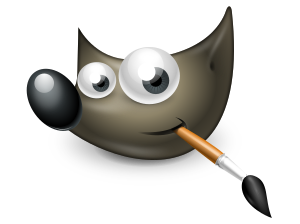

Gimp permite la creacion de scripts en python para automatizar procesos y crear tus propias funcionalidades que seran accesibles desde el entorno de edición. En este escenario simulado propondremos la creación de diferentes filtros a modo prototipo usando opencv, que luego deberian ser trasladados a gimp-fu como se puede ver en el siguiente tutorial de youtube:
https://www.youtube.com/watch?v=8z0VEFBSgqA

Importamos librerias

In [1]:
# importamos las libreiras
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np

### **Cargar imagenes del dataset**
En primer vamos cargar la imagen que vamos a editor. Se puede probar con diferentes imagenes para ver los efectos que somos capaces de lograr.

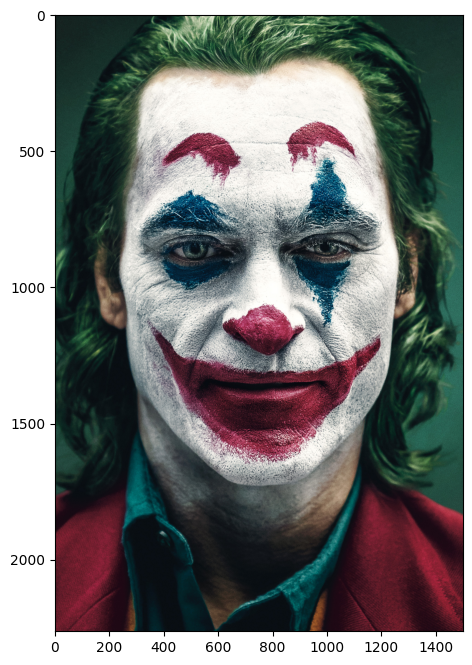

Shape = (2264, 1500, 3)


In [2]:
# nombre de la imagen a cargar
image_path = 'data/Joker.jpg'

# cargamos la imagen
image  = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.show()

print('Shape = ' + str(image.shape))

### **Filtro de sharpen**
En primer lugar vamos a crear un filtro para realzar los bordes. Para ello hay que aplicar el siguiente kernel usando la funcion [cv2.filter2D](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html):

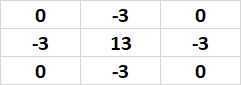


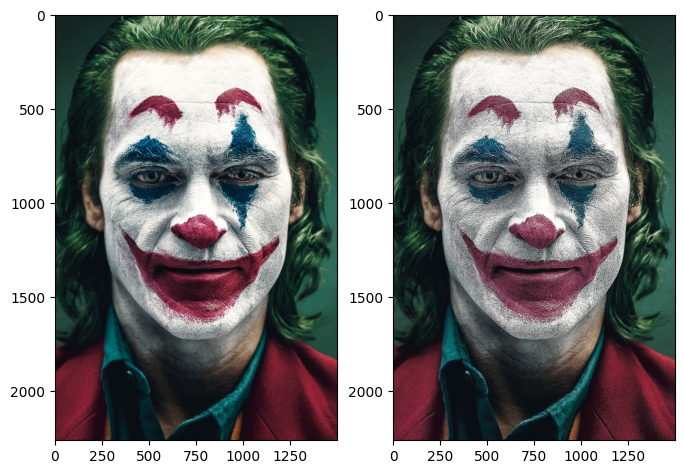

In [3]:
# definimos el array
kernel = np.array((
    [0, -3, 0],
    [-3, 13, -3],
    [0, -3, 0]), dtype="int")

# Aplicamos a la imagen
output_image = cv2.filter2D(image, -1, kernel)

plt.subplot(121),plt.imshow(image)
plt.subplot(122),plt.imshow(output_image)
plt.show()

### **Filtro sepia**
A continuació se pide la implementación de un filtro que convierta la imagen a color sepia como si de una imagen antigua se tratara. Para ello se debe utilizar el siguiente kernel aplicandolo mediante la funcion [cv2.filter2D](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html):

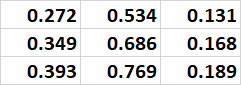

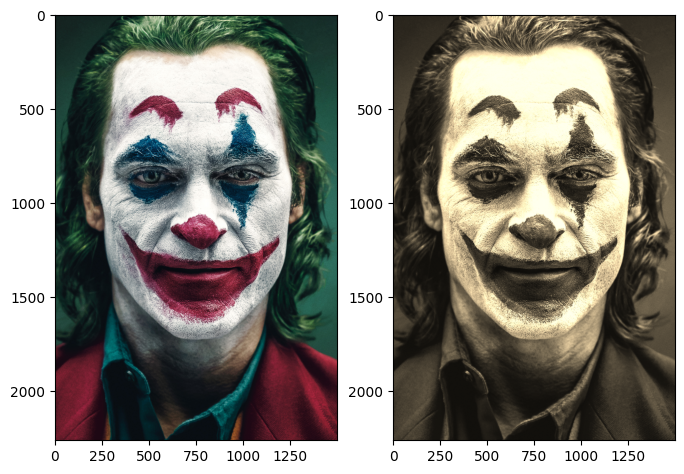

In [4]:
# creamos el filtro sepia
kernel = np.array([[0.272, 0.534, 0.131],
                   [0.349, 0.686, 0.168],
                   [0.393, 0.769, 0.189]])

# Applying cv2.transform function
output_image =cv2.transform(image,kernel)

output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)

plt.subplot(121),plt.imshow(image)
plt.subplot(122),plt.imshow(output_image)
plt.show()

### **Espacio HSV**
Se pide convertir la imagen al espacio HSV y modificar los valores de la sumando una constante por canal


```
# Modificamos la imagen en el espacio HSV
h += 200;
s += 30;
v -= 10;
```



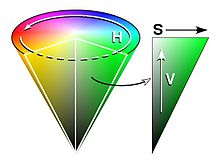
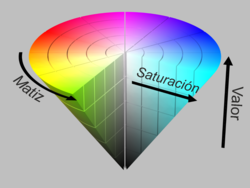

El resultado deberia quedar asi:

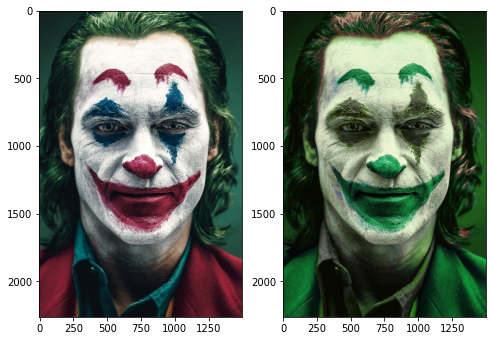

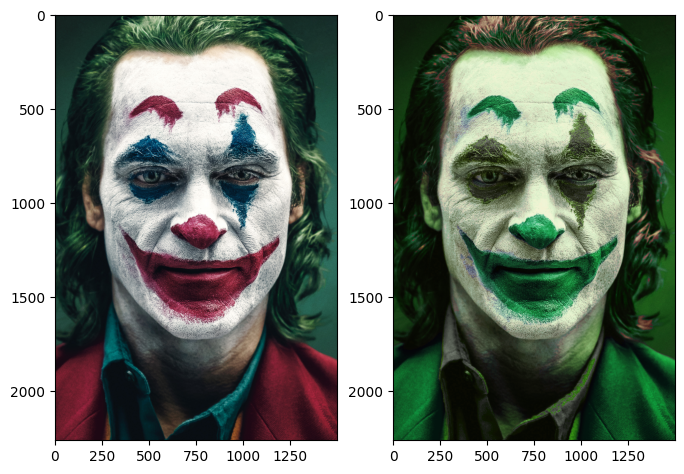

In [5]:
# creamos la iamgen de salida en el espacio de color HSV
out_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Modificamos la imagen en el espacio HSV
out_image[:,:, 0] += 200;
out_image[:,:, 1] += 30;
out_image[:,:, 2] -= 10;

out_image = cv2.cvtColor(out_image, cv2.COLOR_HSV2RGB)
plt.subplot(121), plt.imshow(image)
plt.subplot(122), plt.imshow(out_image)
plt.show()

### **Filtro splash**
Se pide crear un filtro capaz  mediante una seleccion de un rango de colores en hsv, poder pintar solo esos colores en una imagen de gris. En este caso queremos quedarnos solo el color rojo.
El resultado deberia ser asi:

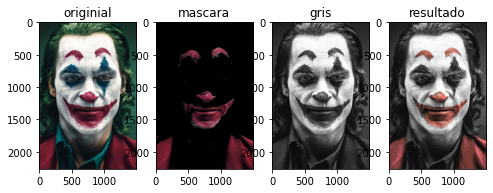

 El espacio de color HSV permite escoger la matiz, la saturación y el valor.
Para poder seleccionar un rango primero deberemos pasar la imagen a HSV y utilizar la funcion [cv2.inRange()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981) para crear una mascara solo de los colores que hayamos seleccionado

La siguiente tabla muestra los valores de H en grados que nos permitiran seleccionar el color deseado.

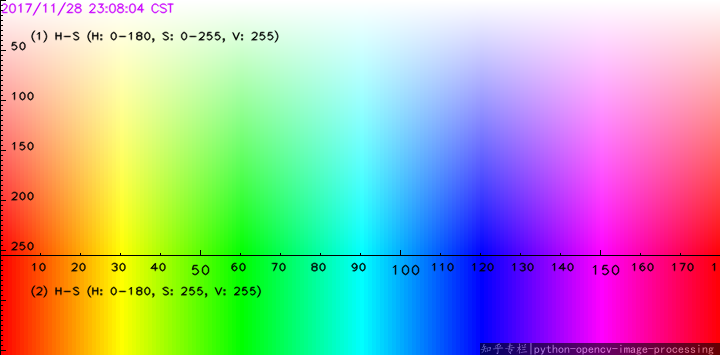

Algunos tutoriales de ejemplo:

[cv2.inRange() doc oepncv](https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html)

[ejemplo de uso](https://pythonprogramming.net/color-filter-python-opencv-tutorial/)

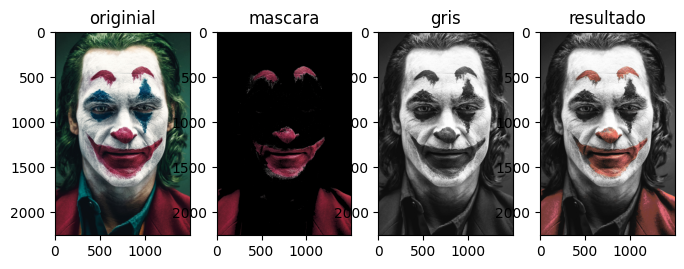

In [6]:
# metodo para obtener una mascara que obtiene un rango dels espacio de color hsv
def hsv(img, l, u):
    # pasamos la imagen a rgb ya que opencv trabaja en bgr
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # pasamos al espacio hsv
    hsv = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)

    # definimos los limites
    lower = np.array([l,0,0]) 
    upper = np.array([u,255,255])

    # creamos la mascara
    mask = cv2.inRange(hsv, lower, upper) # generating mask
    return mask

# valores para quedarnos con el rojo
lower = 170 
upper = 190

# copiamos la imagen original pasandola a gris y volviendo a convertir a color
gray_image = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),  cv2.COLOR_GRAY2RGB)

# llamamos al metodo para crear la mascara
mask = hsv(image, lower, upper)

# aplicamos la mascara para quedarnos solo con los colores deseados
res = cv2.bitwise_and(image, image, mask= mask)

# sumamos la mascara
output_image = cv2.bitwise_or(res, gray_image)

plt.subplot(141), plt.title('originial'),plt.imshow(image, cmap = 'gray')
plt.subplot(142), plt.title('mascara'), plt.imshow(res, cmap = 'gray')
plt.subplot(143), plt.title('gris'), plt.imshow(gray_image, cmap = 'gray')
plt.subplot(144), plt.title('resultado'), plt.imshow(output_image)
plt.show()

## **Intesidad de colores**
Otro filtro que encontramos interesante es uno que nos permita modificar la intensidad de cada canal de color de la imagen. Para ello se deben implementar tres slides en el notebook para que sea facil jugar con ellos. 
Esto se puede hacer con los widgets de jupyter notebooks

red_channel = 100  #@param {type: "slider", min: 0, max: 100}

Modificando estos slides veremos como la imagen va ganando o perdiendo intesidad para cada canal


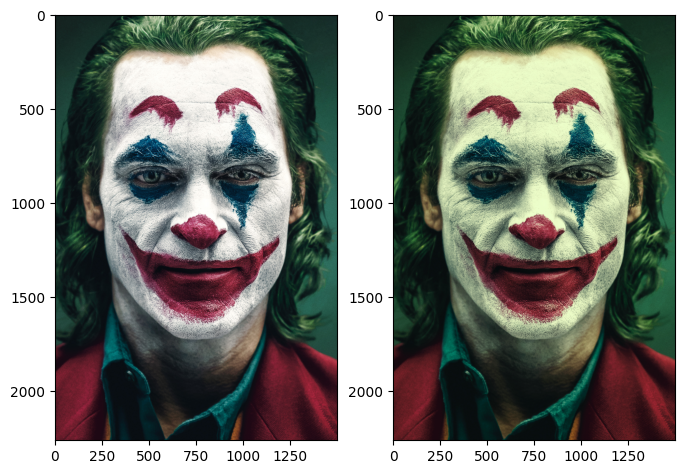

In [7]:
# valores de los sliders
red_channel = 93  #@param {type: "slider", min: 0, max: 100}
green_channel = 100  #@param {type: "slider", min: 0, max: 100}
blue_channel = 81  #@param {type: "slider", min: 0, max: 100}

output_image = image.copy()

output_image[:,:,0] = ((output_image[:,:,0] /255) * red_channel/100) *255
output_image[:,:,1] = ((output_image[:,:,1] /255) * green_channel/100)*255
output_image[:,:,2] = ((output_image[:,:,2] /255) * blue_channel/100)*255

plt.subplot(121),plt.imshow(image)
plt.subplot(122),plt.imshow(output_image)
plt.show()

In [10]:
# Importamos las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from IPython.display import display

# Carga tu imagen aquí
image_path = 'data/Joker.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def adjust_color_intensity(red_channel, green_channel, blue_channel):
    output_image = image.copy()
    output_image[:,:,0] = ((output_image[:,:,0] / 255) * red_channel / 100) * 255
    output_image[:,:,1] = ((output_image[:,:,1] / 255) * green_channel / 100) * 255
    output_image[:,:,2] = ((output_image[:,:,2] / 255) * blue_channel / 100) * 255
    
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(image), plt.title('Original Image')
    plt.subplot(122), plt.imshow(output_image.astype(np.uint8)), plt.title('Adjusted Image')
    plt.show()

# Crear sliders para los canales de color
interact(adjust_color_intensity,
         red_channel=IntSlider(min=0, max=100, value=100, description='Red Channel:'),
         green_channel=IntSlider(min=0, max=100, value=100, description='Green Channel:'),
         blue_channel=IntSlider(min=0, max=100, value=100, description='Blue Channel:'))


## **Filtro cartoon**
Este filtro nos permite convertir una imagen real a un dibujo animado. Para ello podemos utilizar la combinación de filtros aprendidos hasta ahora que consideremos necesarias para obtener en primer lugar los contornos que convertiremos en mascara y en segundo lugar difuminar los colores. Finalmente aplicamos una funcion and que nos permita extraer los contornos a la imagen para remarcar los trazados.
El resultado deberia ser algo asi:

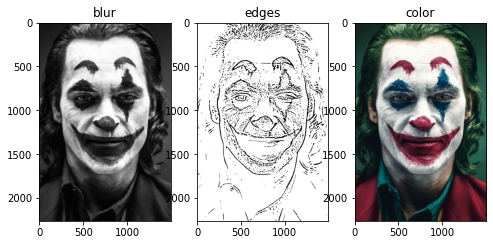

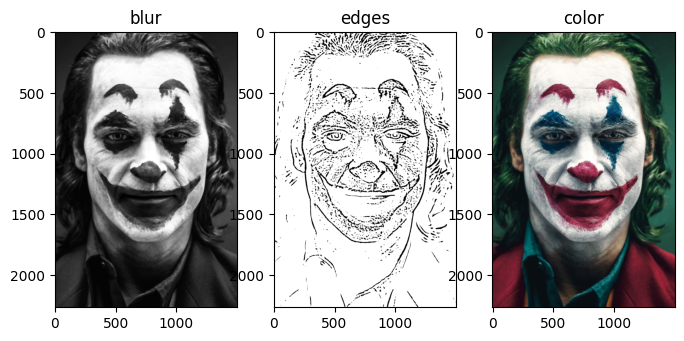

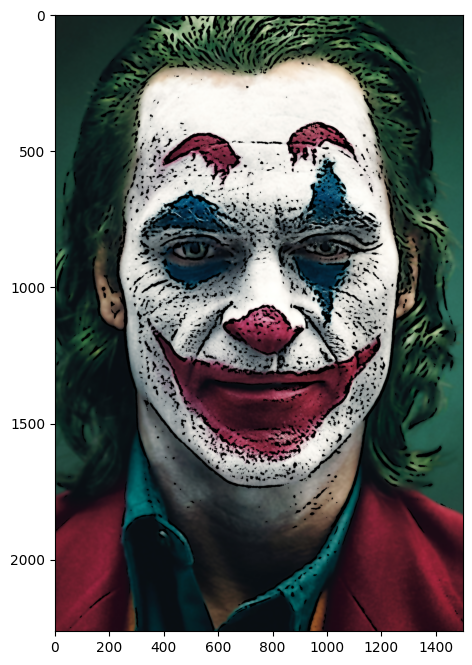

In [8]:
# difuminamos la imagen
blur = cv2.medianBlur(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 11)
# calculamos los contronos
edges = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 7)

# creamos el filtro billaterla
color = cv2.bilateralFilter(image, d=11, sigmaColor=200,sigmaSpace=250)

# aplicamos la mascara
cartoon = cv2.bitwise_and(color, color, mask=edges)

# mostramos los resultados
plt.subplot(131), plt.title('blur'),plt.imshow(blur, cmap = 'gray')
plt.subplot(132), plt.title('edges'), plt.imshow(edges, cmap = 'gray')
plt.subplot(133), plt.title('color'), plt.imshow(color, cmap = 'gray')
plt.show()

plt.imshow(cartoon, cmap='gray')
plt.show()

### **Añadir titulo**
Por ultimo, se pide añadir un titulo a la imagen filtrada que deseamos. Para ello vamos a cargar una nueva imagen que contenga fondo negro y letras blancas o grises.

In [ ]:
# nombre de la imagen a cargar
image_path = 'data/title.jpg'

# cargamos la imagen
title  = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2BGR)
plt.imshow(title)
plt.show()

print('Shape = ' + str(image.shape))

Para ello, vamos a reescalar la imagen de las letras al tamaño que consideremos oportuno. Despues crearemos una imagen negra del tamaño de la imagen de entrada donde pondremos los titulos. Por ultimo haremos una operación or para superponer las letras a la imagen de entrada. El resultado esperado deberia ser similar a la siguiente imagen:


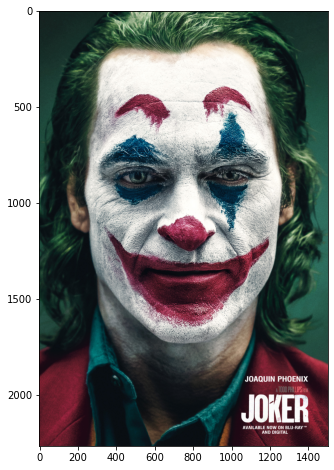

In [ ]:

# seleccionamos el factor de escalado
scale_factor = 3
dim = (int(title.shape[0]/scale_factor) , int(title.shape[1]/scale_factor))

# redimensionamos la imagen
resized = cv2.resize(title,dim,  interpolation = cv2.INTER_AREA)

# creamos la imagen de salida
output_image = np.zeros(image.shape, dtype='uint8')

# coordenadas donde queremos colocar el titulo
start_x = 1900
start_y = 1050

# Ponemos el texto donde ha indicado el usuario
output_image[start_x: start_x + resized.shape[0], start_y : start_y + resized.shape[1]] = resized

# hacemos una operación or para superponer el logo en la imagen
output_image = cv2.bitwise_or(image, output_image)
plt.imshow(output_image)
plt.show()

print('Shape = ' + str(image.shape))